# Hello Soft Clustering (GMM)

### T1. Using 3 mixtures, initialize your Gaussian with means (3,3), (2,2), and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mix- ture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration. (You may do the calculations by hand or write code to do so)



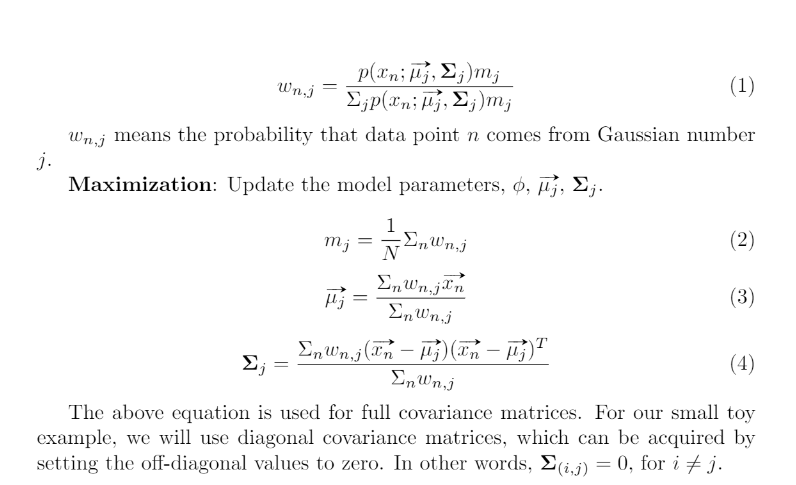

## TODO: Complete functions below including
- Fill relevant parameters in each function.
- Implement computation and return values.

These functions will be used in T1-4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hint: You can use this function to get gaussian distribution.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html
from scipy.stats import multivariate_normal

In [3]:
class GMM:
    def __init__(self, mixture_weight, mean_params, cov_params):
        """
        Initialize GMM.
        """
        # Copy construction values.
        self.mixture_weight = mixture_weight
        self.mean_params = mean_params + 1e-10
        self.cov_params = cov_params + 1e-20

        # Initiailize iteration.
        self.n_iter = 0

    def estimation_step(self, data):
        """
        TODO: Perform estimation step. Then, return w_{n,j} in eq. 1)
        """
        prob = [multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]).pdf(data) for i in range(self.mean_params.shape[0])]
        prob = np.array(prob)

        prob_m = np.dot(np.eye(self.mixture_weight.shape[0]) * self.mixture_weight, prob)

        w = prob_m / (np.sum(prob_m, axis=0))

        return w


    def maximization_step(self, data, w):
        """
        TODO: Perform maximization step.
            (Update parameters in this GMM model.)
        """
        self.mixture_weight = (1/data.shape[0])*np.sum(w, axis=1)

        self.mean_params = (np.dot(w, data).T/ (w.sum(axis=1)+1e-10)).T

        self.cov_params = np.array([np.dot((w[i].reshape(-1,1)*(data-self.mean_params[i])).T, (data-self.mean_params[i]))/(np.sum(w[i])+1e-10) for i in range(self.mean_params.shape[0])])
        self.cov_params = (self.cov_params+1e-10) * np.eye(self.cov_params.shape[1])


    def get_log_likelihood(self, data):
        """
        TODO: Compute log likelihood.
        """
        log_likelihood = np.log(np.array([multivariate_normal(mean=self.mean_params[i], cov=self.cov_params[i]).pdf(data)*self.mixture_weight[i] for i in range(self.mean_params.shape[0])]).sum(axis=0)).sum()

        return log_likelihood

    def print_iteration(self):
        print("m :\n", self.mixture_weight)
        print("mu :\n", self.mean_params)
        print("covariance matrix :\n", self.cov_params)
        print("-------------------------------------------------------------")

    def perform_em_iterations(self, data, num_iterations, display=True):
        """
        Perform estimation & maximization steps with num_iterations.
        Then, return list of log_likelihood from those iterations.
        """
        log_prob_list = []

        # Display initialization.
        if display:
            print("Initialization")
            self.print_iteration()

        for n_iter in range(num_iterations):
            w = self.estimation_step(data)
            self.maximization_step(data, w)

            # Calculate log prob.
            log_prob = self.get_log_likelihood(data)
            log_prob_list.append(log_prob)

            # Display each iteration.
            if display:
                print(f"Iteration: {n_iter}")
                self.print_iteration()

        return log_prob_list

In [4]:
def run_exp(mixture_weight, mean_params, cov_params, data, num_iterations):
    gmm = GMM(mixture_weight, mean_params, cov_params)

    log_prob_list = gmm.perform_em_iterations(data, num_iterations)
    print('log prob list :',log_prob_list)

    plt.figure(figsize=(20, 10))
    
    plt.subplot(2, 1, 1)
    plt.grid()
    plt.title('Log likelihood history')
    plt.plot(np.arange(num_iterations), log_prob_list)

    plt.subplot(2, 1, 2)
    plt.grid()
    plt.scatter(x=data[:, 0],
                y=data[:, 1])

    for idx, mu_cluster in enumerate(gmm.mean_params):
        plt.scatter(mu_cluster[0],
                    mu_cluster[1],
                    cmap=idx,
                    marker='x',
                    s=1000)

    plt.show()

    return log_prob_list

Initialization
m :
 [1 1 1]
mu :
 [[ 3.  3.]
 [ 2.  2.]
 [-3. -3.]]
covariance matrix :
 [[[1.e+00 1.e-20]
  [1.e-20 1.e+00]]

 [[1.e+00 1.e-20]
  [1.e-20 1.e+00]]

 [[1.e+00 1.e-20]
  [1.e-20 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.45757242 0.20909425 0.33333333]
mu :
 [[ 5.78992692  5.81887265]
 [ 1.67718211  2.14523106]
 [-4.         -4.66666666]]
covariance matrix :
 [[[4.53619412 0.        ]
  [0.         4.28700611]]

 [[0.51645579 0.        ]
  [0.         0.13152618]]

 [[4.66666668 0.        ]
  [0.         2.88888891]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.40711618 0.25954961 0.33333421]
mu :
 [[ 6.27176215  6.27262711]
 [ 1.72091544  2.14764812]
 [-3.99998589 -4.6666488 ]]
covariance matrix :
 [[[2.94672736 0.        ]
  [0.         2.93847196]]

 [[0.49649261 0.        ]
  [0.         0.12584815]]

 [[4.66673088 0.        ]
  [0.         2.88900236]]]
-------------------------

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_50773/1722338818.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mu_cluster[0],


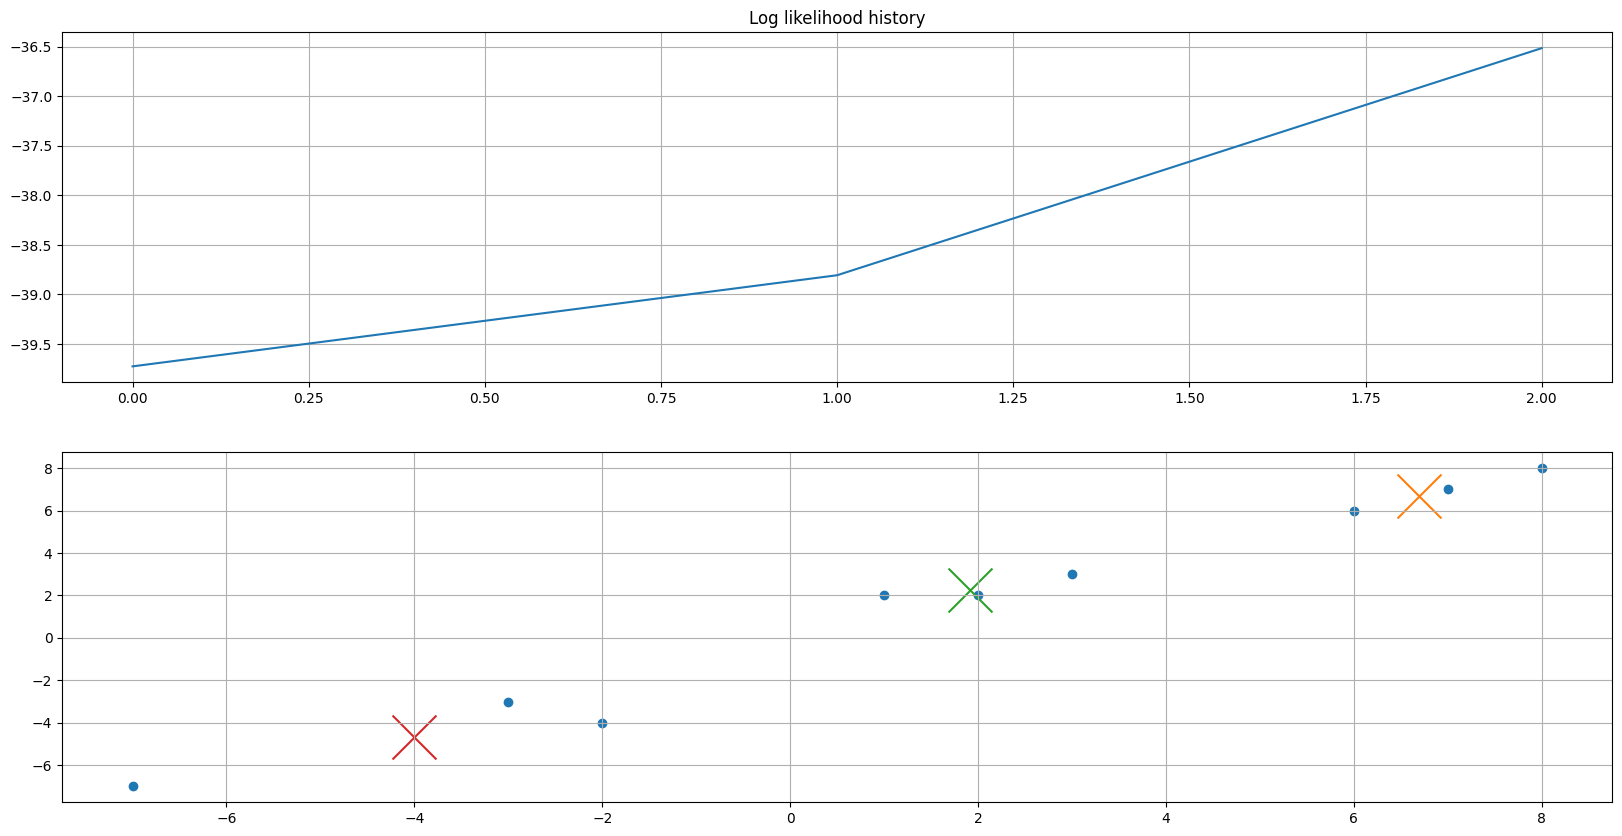

In [5]:
num_iterations = 3
num_mixture = 3
mixture_weight = [1] * num_mixture # m
mixture_weight = np.array(mixture_weight)
mean_params = np.array([[3,3], [2,2], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

X, Y = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7]), np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
data = np.vstack([X,Y]).T

three_group = run_exp(mixture_weight = mixture_weight,
                      mean_params = mean_params,
                      cov_params = cov_params,
                      data=data,
                      num_iterations=num_iterations)

### T2. Plot the log likelihood of the model given the data after each EM step. In other words, plot $\log \prod_n p( \vec{x_n} |φ, \vec{μ} , Σ)$. Does it goes up every iteration just as we learned in class?



    ANS : Yes. It's go up from -39.5 to -36.5

### T3. Using 2 mixtures, initialize your Gaussian with means (3,3) and (-3,-3), and standard Covariance, I, the identity matrix. Use equal mixture weights as the initial weights. Repeat three iterations of EM. Write down $w_{n,j}$ , $m_j$ , $\vec{μ_j}$, $\Sigma_j$ for each EM iteration.



Initialization
m :
 [1 1]
mu :
 [[ 3.  3.]
 [-3. -3.]]
covariance matrix :
 [[[1.e+00 1.e-20]
  [1.e-20 1.e+00]]

 [[1.e+00 1.e-20]
  [1.e-20 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
m :
 [0.66666666 0.33333334]
mu :
 [[ 4.50000001  4.66666667]
 [-3.99999997 -4.66666663]]
covariance matrix :
 [[[6.91666665 0.        ]
  [0.         5.88888889]]

 [[4.66666677 0.        ]
  [0.         2.8888891 ]]]
-------------------------------------------------------------
Iteration: 1
m :
 [0.66669436 0.33330564]
mu :
 [[ 4.49961311  4.66620178]
 [-3.99993241 -4.66651231]]
covariance matrix :
 [[[6.91944755 0.        ]
  [0.         5.89275124]]

 [[4.66806942 0.        ]
  [0.         2.89103318]]]
-------------------------------------------------------------
Iteration: 2
m :
 [0.66669453 0.33330547]
mu :
 [[ 4.49961084  4.66619903]
 [-3.99993206 -4.6665114 ]]
covariance matrix :
 [[[6.91946372 0.        ]
  [0.         5.8927741 ]]

 [[4.66807754 0.    

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_50773/1722338818.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mu_cluster[0],


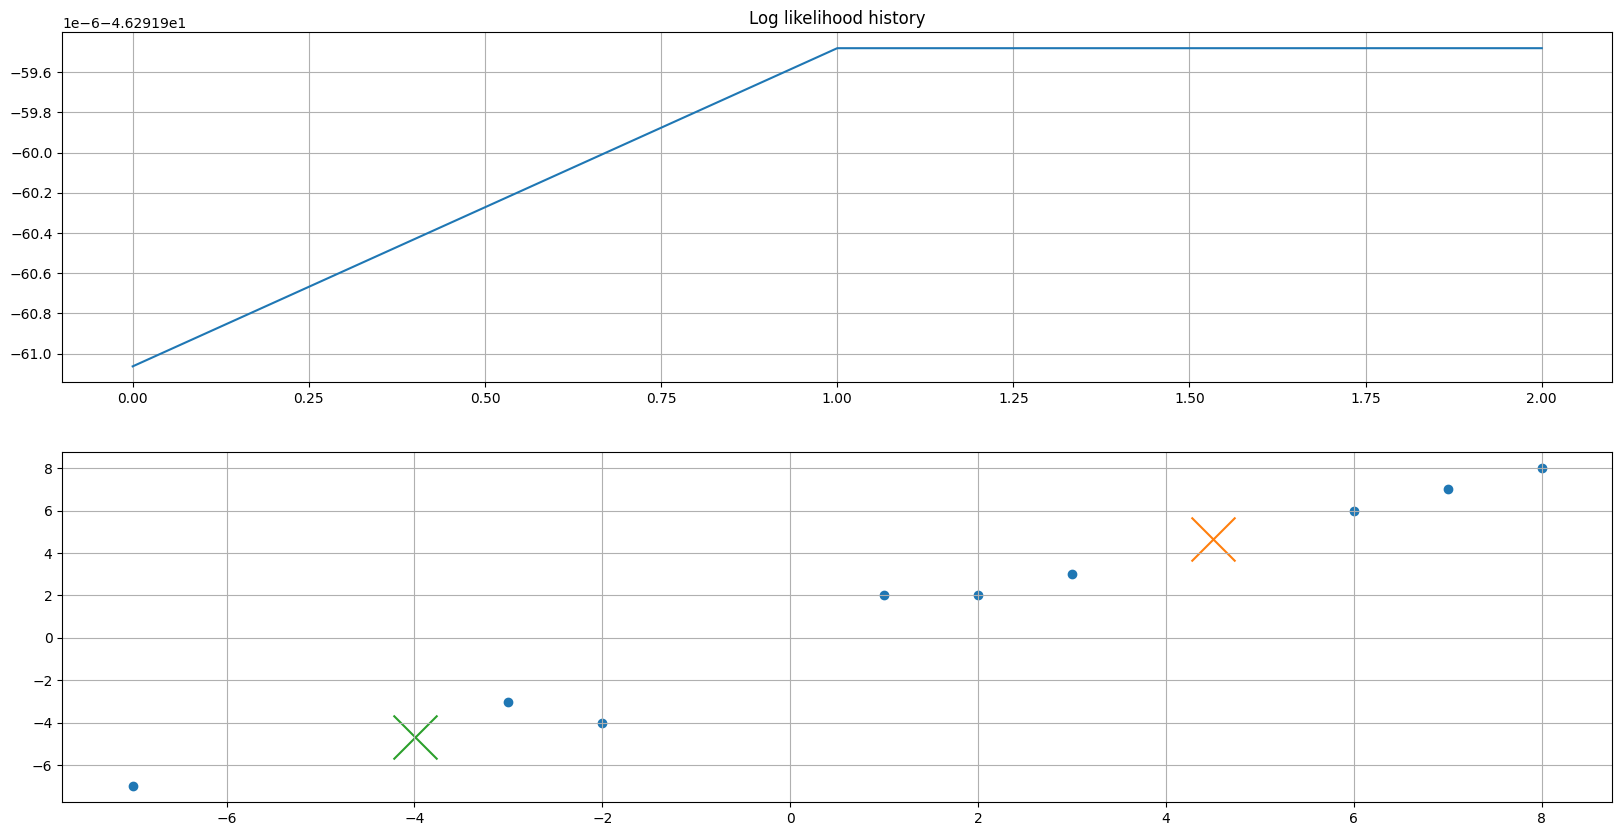

[-46.2919610629504, -46.29195948129465, -46.29195948124025]


In [6]:
num_mixture = 2
mixture_weight = [1] * num_mixture
mixture_weight = np.array(mixture_weight)

mean_params = np.array([[3,3], [-3,-3]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
two_group = run_exp(mixture_weight,
                    mean_params,
                    cov_params,
                    data,
                    num_iterations)

print(two_group)

### T4. Plot the log likelihood of the model given the data after each EM step. Compare the log likelihood between using two mixtures and three mixtures. Which one has the better likelihood?

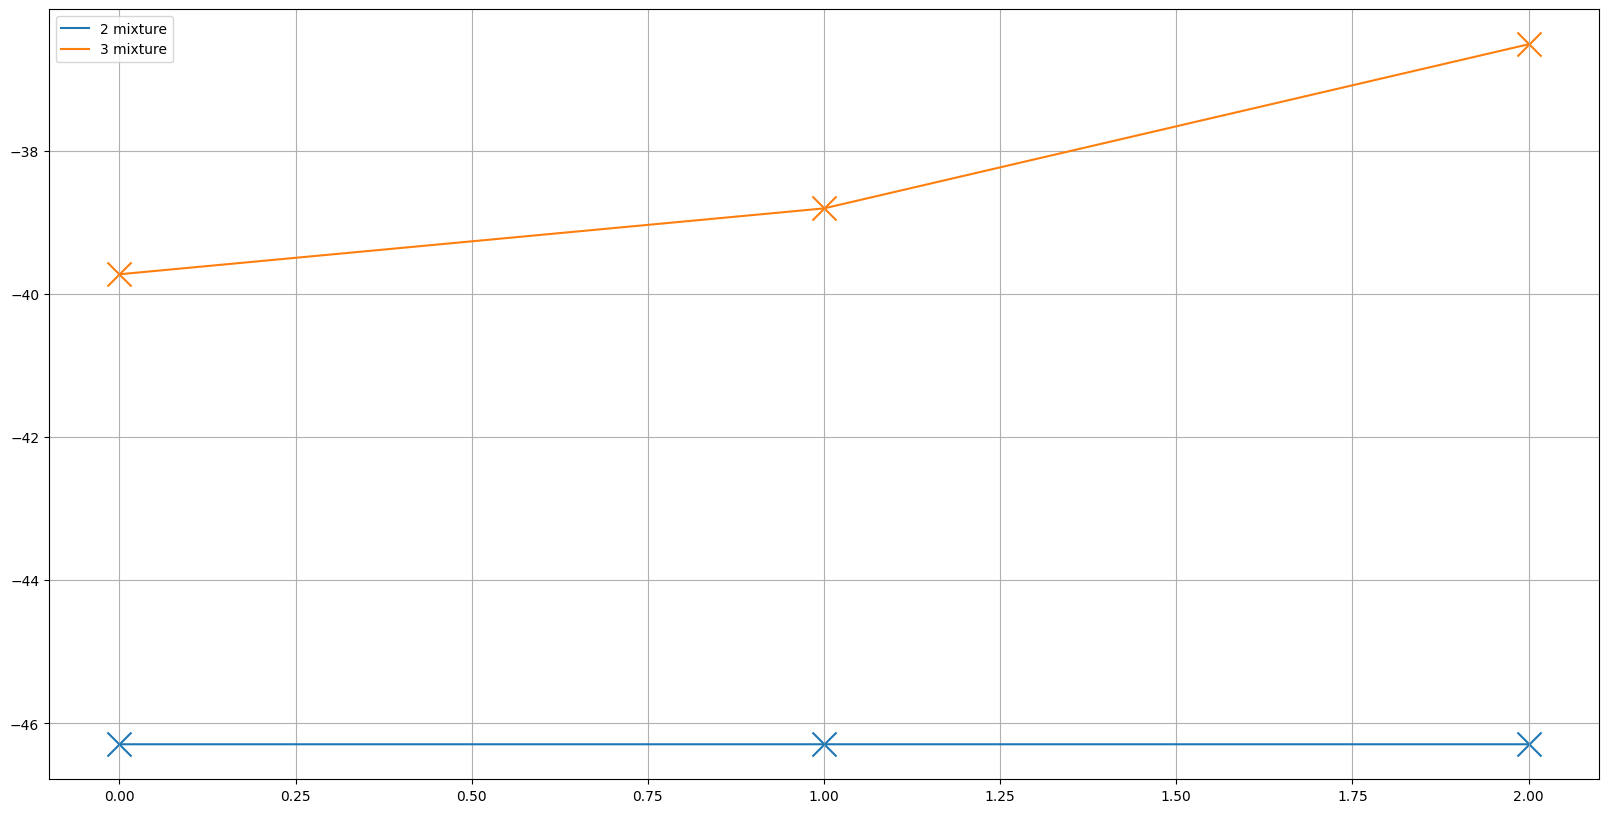

In [7]:
# TODO: Plot Comparision of log_likelihood from T1 and T3

plt.figure(figsize=(20, 10))

plt.plot(np.arange(num_iterations), two_group, label='2 mixture')
plt.scatter(np.arange(num_iterations), two_group, marker='x', s=300)
plt.plot(np.arange(num_iterations), three_group, label='3 mixture')
plt.scatter(np.arange(num_iterations), three_group, marker='x', s=300)

plt.legend()
plt.grid()

    ANS : The best likelihood is 3-mixtures. 2-mixtures like not converge.

### OT1.
    ANS : got divide by zero (cov mat is 0 ) so the fixing method is
    - add small value to the cov mat
    - use some data to be mean so after calculate cov mat will not be 0

Initialization
m :
 [1 1]
mu :
 [[1.e-10 1.e-10]
 [1.e+04 1.e+04]]
covariance matrix :
 [[[1.e+00 1.e-20]
  [1.e-20 1.e+00]]

 [[1.e+00 1.e-20]
  [1.e-20 1.e+00]]]
-------------------------------------------------------------
Iteration: 0
m :
 [1. 0.]
mu :
 [[1.66666667 1.55555556]
 [0.         0.        ]]
covariance matrix :
 [[[2.22222222e+01 0.00000000e+00]
  [0.00000000e+00 2.42469136e+01]]

 [[1.00000000e-10 0.00000000e+00]
  [0.00000000e+00 1.00000000e-10]]]
-------------------------------------------------------------
Iteration: 1
m :
 [1. 0.]
mu :
 [[1.66666667 1.55555556]
 [0.         0.        ]]
covariance matrix :
 [[[2.22222222e+01 0.00000000e+00]
  [0.00000000e+00 2.42469136e+01]]

 [[1.00000000e-10 0.00000000e+00]
  [0.00000000e+00 1.00000000e-10]]]
-------------------------------------------------------------
Iteration: 2
m :
 [1. 0.]
mu :
 [[1.66666667 1.55555556]
 [0.         0.        ]]
covariance matrix :
 [[[2.22222222e+01 0.00000000e+00]
  [0.00000000e+00 2.4246

/var/folders/5g/160h3py942nb4pbbgy0dhtz40000gn/T/ipykernel_50773/1722338818.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(mu_cluster[0],


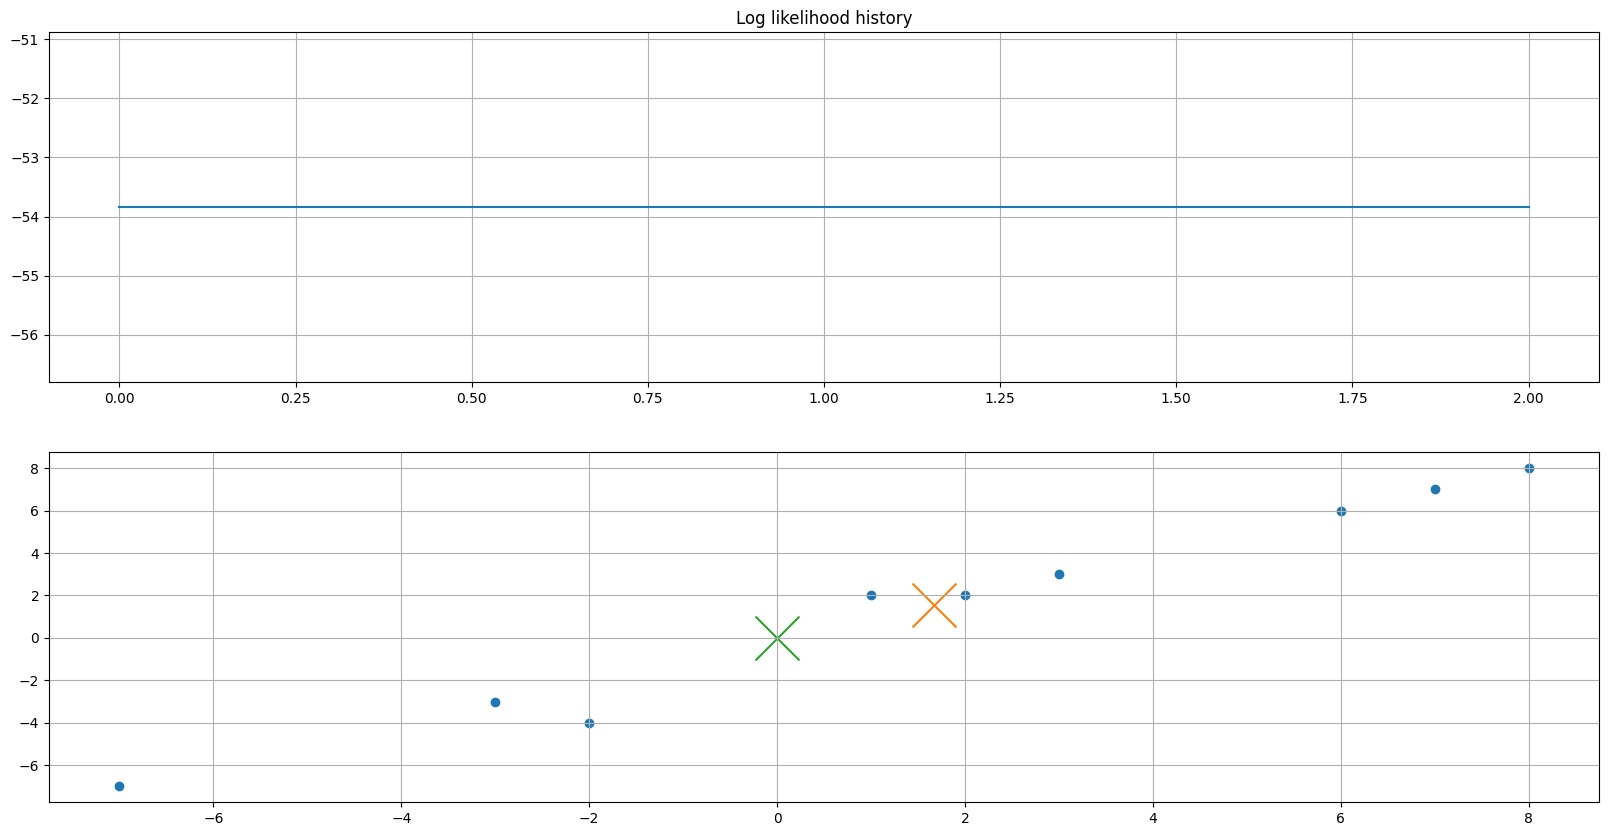

[-53.84311315322616, -53.84311315322616, -53.84311315322616]


In [8]:
num_mixture = 2
mixture_weight = [1] * num_mixture
mixture_weight = np.array(mixture_weight)

mean_params = np.array([[0, 0], [10000, 10000]], dtype = float)
cov_params = np.array([np.eye(2)] * num_mixture)

# INSERT CODE HERE
two_group = run_exp(mixture_weight,
                    mean_params,
                    cov_params,
                    data,
                    num_iterations)

print(two_group)

# The face database

In [9]:
# Download facedata for google colab
# !wget -nc https://github.com/ekapolc/Pattern_2024/raw/main/HW/HW03/facedata_mat.zip
# !unzip facedata_mat.zip

In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

# Change path to your facedata.mat file.
facedata_path = 'facedata.mat'

data = scipy.io.loadmat(facedata_path)
data_size = data['facedata'].shape

%matplotlib inline
data_size

(40, 10)

### Preprocess xf

In [11]:
xf = np.zeros((data_size[0], data_size[1], data['facedata'][0,0].shape[0], data['facedata'][0,0].shape[1]))
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])

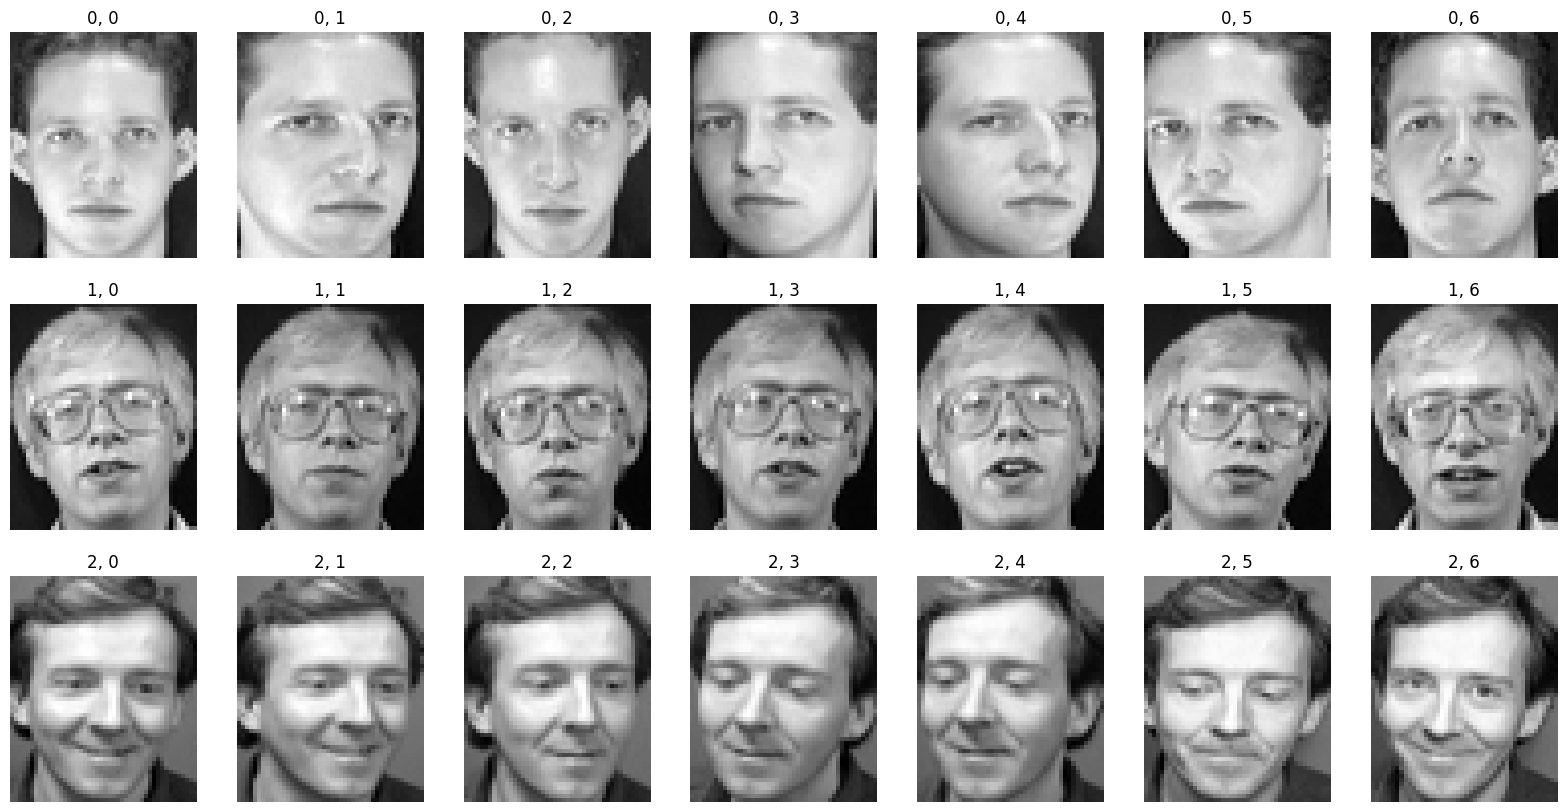

In [12]:
# Example: Ploting face image.
plt.figure(figsize=(20, 10))
for idx in range(21):
    plt.subplot(3, 7 , idx+1)
    plt.title(f"{idx//7}, {idx%7}")
    plt.imshow(xf[idx//7,idx%7], cmap = 'gray')
    plt.axis('off')
plt.show()

### T5. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance between xf[0,0] and xf[1,0]? Does the numbers make sense? Do you think these numbers will be useful for face verification?

In [13]:
def L2_dist(x1, x2):
    """
    TODO: Calculate L2 distance.
    """
    return np.sqrt(((x1-x2)**2).sum())

# Test L2_dist
def test_L2_dist():
    assert L2_dist(np.array([1, 2, 3]), np.array([1, 2, 3])) == 0.0
    assert  L2_dist(np.array([0, 0, 0]), np.array([1, 2, 3])) == np.sqrt(14)

test_L2_dist()

print('Euclidean distance between xf[0,0] and xf[0,1] is', L2_dist(xf[0,0], xf[0,1]))
print('Euclidean distance between xf[0,0] and xf[1,0] is', L2_dist(xf[0,0], xf[1,0]))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] is 8.173295099737281


    ANS : the distance is make sence in term of position of face but it's not useful for seperating the owner of face bs. image 0,0 and 1,0 are both front view so ED is small compared with 0,0 and 0,1 that are different view(0,1 are slighly turn left)

### T6. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and then output the similarity matrix A. Show the matrix as an image. Use the feature vectors from the first 3 images from all 40 people for list T (in order x[0, 0], x[0, 1], x[0, 2], x[1, 0], x[1, 1], ...x[39, 2]). Use the feature vectors from the remaining 7 images from all 40 people for list D (in order x[0, 3], x[0, 4], x[0, 5], x[1, 6], x[0, 7], x[0, 8], x[0, 9], x[1, 3], x[1, 4]...x[39, 9]). We will treat T as our training images and D as our testing images

In [14]:
def organize_shape(matrix):
    """
    TODO (Optional): Reduce matrix dimension of 2D image to 1D and merge people and image dimension.
    This function can be useful at organizing matrix shapes.

    Example:
        Input shape: (people_index, image_index, image_shape[0], image_shape[1])
        Output shape: (people_index*image_index, image_shape[0]*image_shape[1])
    """
    matrix = matrix.copy()
    matrix = matrix.reshape((matrix.shape[0]*matrix.shape[1], matrix.shape[2]*matrix.shape[3]))
    return matrix


def generate_similarity_matrix(A, B):
    """
    TODO: Calculate similarity matrix M,
    which M[i, j] is a distance between A[i] and B[j].
    """
    similarity_matrix = np.zeros((A.shape[0], B.shape[0]))
    for i in range(A.shape[0]):
        for j in range(B.shape[0]):
            similarity_matrix[i][j] = L2_dist(A[i], B[j])

    return similarity_matrix

def test_generate_similarity_matrix():
    test_A = np.array([[1, 2],[3,4]])
    test_B = np.array([[1, 2], [5, 6], [7, 8]])
    expected_matrix = np.sqrt(np.array([[0, 32, 72], [8, 8, 32]]))
    assert (generate_similarity_matrix(test_A, test_B) == expected_matrix).all()

test_generate_similarity_matrix()

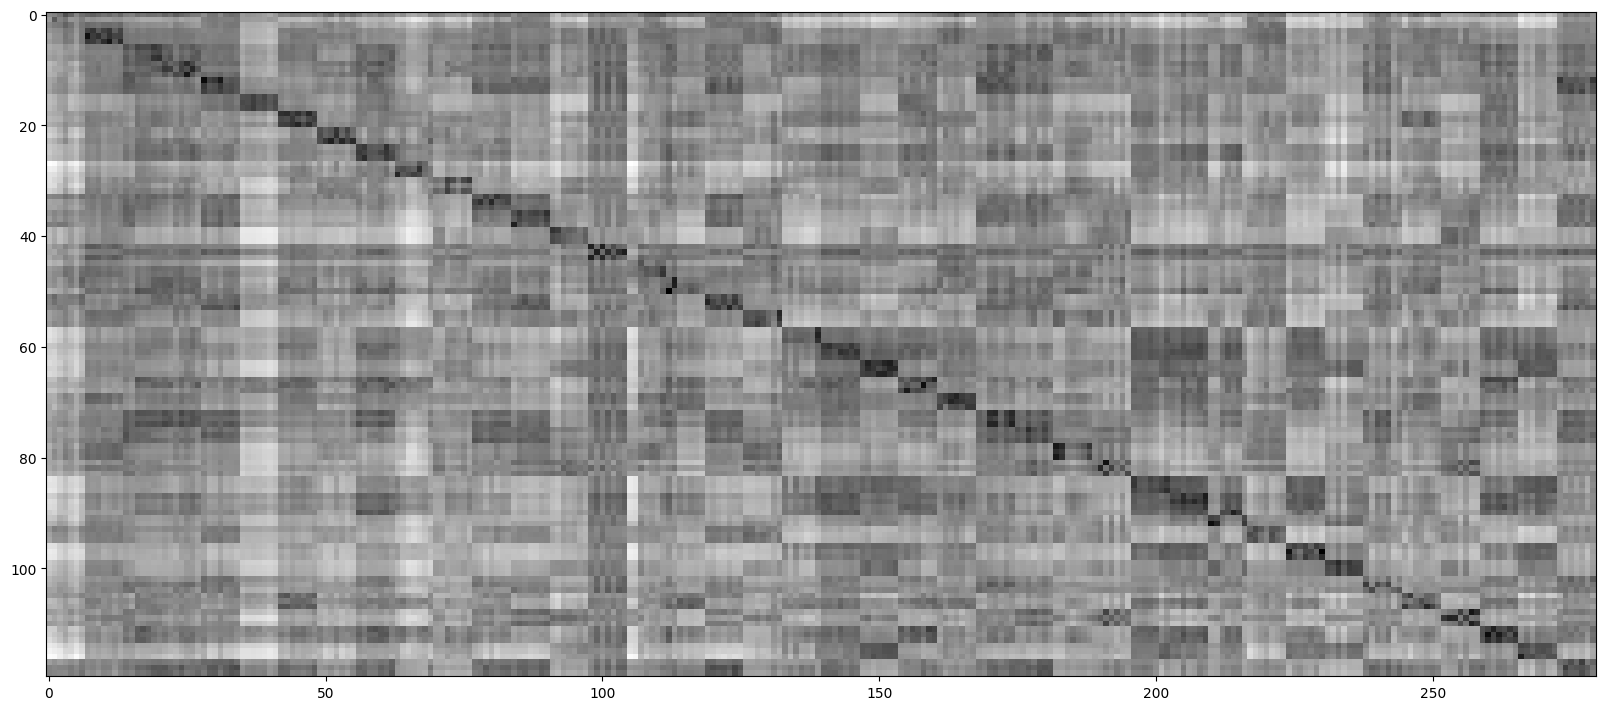

In [15]:
T = organize_shape(xf[:, :3])
D = organize_shape(xf[:, 3:])

similarity_matrix = generate_similarity_matrix(T, D)

plt.figure(figsize=(20, 10))
plt.imshow(similarity_matrix, cmap='gray')

### T7. From the example similarity matrix above, what does the black square between [5:10,5:10] suggest about the pictures from person number 2? What do the patterns from person number 1 say about the images from person 1?


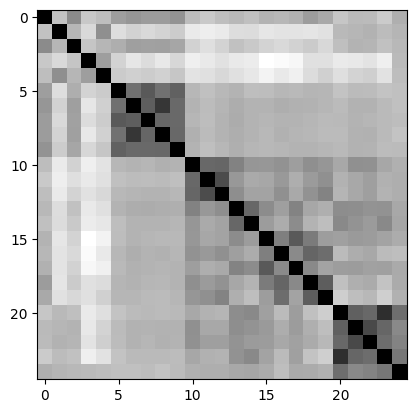

In [16]:
eT = organize_shape(xf[:5, :5])

plt.imshow(generate_similarity_matrix(eT, eT), cmap='gray')

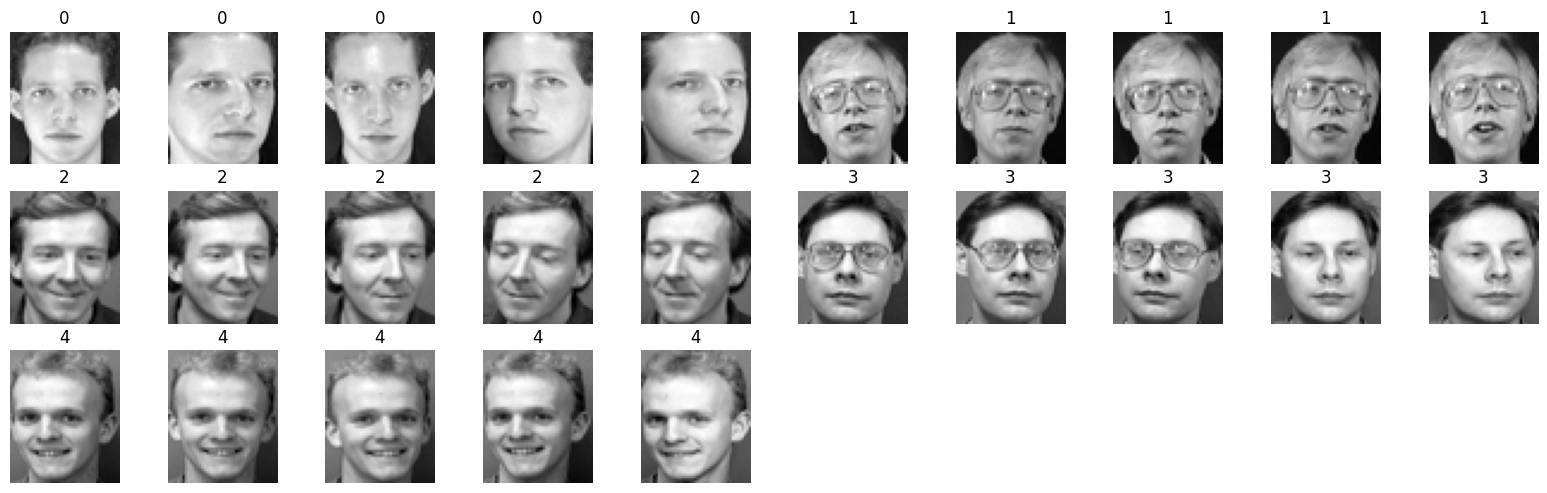

In [17]:
plt.figure(figsize=(20, 10))
for i in range(5):
    for j in range(5):
        plt.subplot(5, 10, 5*i+j+1)
        plt.title(str(i))
        plt.imshow(eT[i*5+j].reshape(56,46), cmap='gray')
        plt.axis('off')

        ANS : for person number 1, his face size in frames are similar and angle of face are similar too. The other have many angle of face and size of face in frame are vary. 

### T8. Write a function that takes in the similarity matrix created from the previous part, and a threshold t as inputs. The outputs of the function are the true positive rate and the false alarm rate of the face verification task (280 Test images, tested on 40 people, a total of 11200 testing per threshold). What is the true positive rate and the false alarm rate for t = 10?

In [18]:
from sklearn.metrics import classification_report

def evaluate_performance(similarity_matrix, threshold):
    """
    TODO: Calculate true positive rate and false alarm rate from given similarity_matrix and threshold.
    """
    y_pred = np.zeros((40, 280))
    y_actual = np.zeros((40, 280))
    for i in range(40):
        for j in range(280):
            y_pred[i, j] = similarity_matrix[3*i:3*i+3, j].min() < threshold
            y_actual[i, j] = i == j//7

    tp = np.where(y_pred==y_actual, y_pred, 0).sum()
    tn = np.where(y_pred==y_actual, 1-y_pred, 0).sum()
    fp = np.where(y_pred!=y_actual, 1-y_actual, 0).sum()
    fn = np.where(y_pred!=y_actual, y_actual, 0).sum()

    true_pos_rate = tp/(tp+fn)
    false_alarm_rate = fp/(tn+fp)


    return true_pos_rate, false_alarm_rate

# Quick check
# (true_pos_rate, false_alarm_rate) should be (0.9928571428571429, 0.33507326007326005)
evaluate_performance(similarity_matrix, 9.5)

(0.9928571428571429, 0.33507326007326005)

### T9. Plot the RoC curve for this simple verification system. What should be the minimum threshold to generate the RoC curve? What should be the maximum threshold? Your RoC should be generated from at least 1000 threshold levels equally spaced between the minimum and the maximum. (You should write a function for this).

In [19]:
def calculate_roc(input_mat):
    """
    TODO: Calculate a list of true_pos_rate and a list of false_neg_rate from the given matrix.
    """
    tpr_list = []
    far_list = []
    
    n_iter = 2000

    recall = None
    diff_recal = float('inf')
    eer = 0
    diff = float('inf')
    
    rag = input_mat.max() - input_mat.min()
    minv = input_mat.min() + 0.20*rag
    maxv = input_mat.max() - 0.20*rag
    step = (maxv-minv)/n_iter
    for threshold in np.linspace(minv, maxv, n_iter):
        tpr, far = evaluate_performance(input_mat, threshold)
        if abs(far-0.001) < diff_recal:
            recall = tpr
            diff_recal = abs(far-0.001)
        if abs(tpr+far-1) < diff:
            diff = abs(tpr+far-1)
            eer = tpr
        tpr_list.append(tpr)
        far_list.append(far)

    return tpr_list, far_list, eer, recall

def plot_roc(input_mat, label=None):
    """
    TODO: Plot RoC Curve from a given matrix.
    """
    tpr_list, far_list, eer, recall = calculate_roc(input_mat)
    plt.title("Plot of ROC")
    if label:
        plt.plot(far_list, tpr_list, label=label)
    else:
        plt.plot(far_list, tpr_list)
    plt.xlabel('False Alarm Rate')
    plt.ylabel('True Positive Rate')
    print(f"EER : {eer}")
    print(f"Recall at 0.1%% FAR : {recall}")

    return eer

EER : 0.9107142857142857
Recall at 0.1%% FAR : 0.5464285714285714


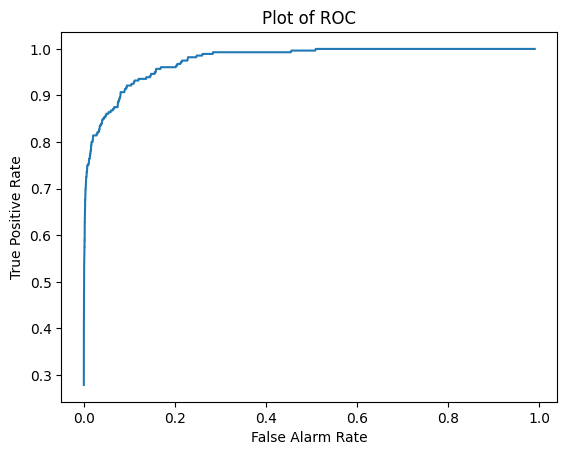

In [20]:
# INSERT CODE HERE
eer = plot_roc(similarity_matrix)

    ANS: I decide to choose minimum and maximum threshold by the following formular
$
\text{min threshold}=\text{min L2}+0.20\times \text{range}
$

and

$
\text{max threshold}=\text{max L2}-0.20\times \text{range}
$

### T10. What is the EER (Equal Error Rate)? What is the recall rate at 0.1% false alarm rate? (Write this in the same function as the previous question)



In [21]:
# You can add more parameter(s) to the function in the previous question.

# EER should be either 0.9071428571428571 or 0.9103759398496248 depending on method.
# Recall rate at 0.1% false alarm rate should be 0.5428571428571428.

    ANS:

### T11. Compute the mean vector from the training images. Show the vector as an image (use numpy.reshape()). This is typically called the meanface (or meanvoice for speech signals). You answer should look exactly like the image shown below.

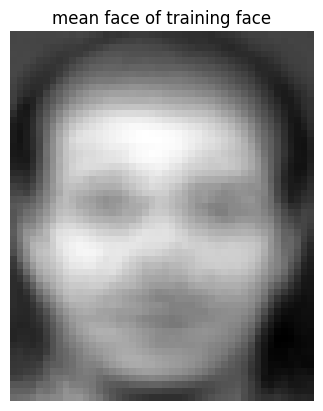

In [22]:
meanface = (T.sum(axis=0)/120.0)

plt.title('mean face of training face')
plt.axis('off')
plt.imshow(meanface.reshape(56, 46), cmap='gray')
plt.show()

### T12. What is the size of the covariance matrix? What is the rank of the covariance matrix?


In [23]:
print(f"""
- X dimension : {T.shape}
- Feature dimension : {T.shape[1]:3,}
- Covariance matrix (outter product) : {T.shape[1]*T.shape[1]:3,}\n  or size : ({T.shape[1]},{T.shape[1]})
- Rank or Cov matrix : {min(T.shape[1], T.shape[0]-1)}
""".strip())

- X dimension : (120, 2576)
- Feature dimension : 2,576
- Covariance matrix (outter product) : 6,635,776
  or size : (2576,2576)
- Rank or Cov matrix : 119


    ANS:


### T13. What is the size of the Gram matrix? What is the rank of Gram matrix? If we compute the eigenvalues from the Gram matrix, how many non- zero eigenvalues do we expect to get?

- size of gram matrix : (120, 120)
- rank of gram matrix : 120
- expected non-zero eigenvalues : 119


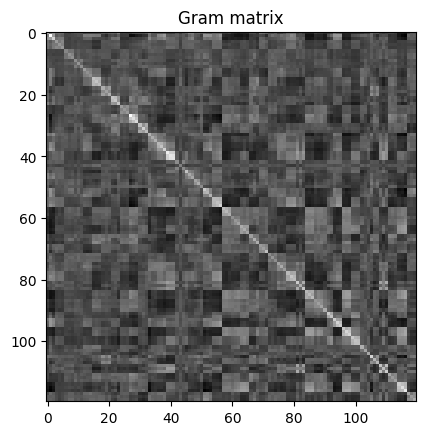

In [24]:
# TODO: Compute gram matrix.
gram_matrix = np.matmul(T-meanface, (T-meanface).T)

plt.title(f'Gram matrix')
plt.imshow(gram_matrix, cmap='gray')

print(f"""
- size of gram matrix : {gram_matrix.shape}
- rank of gram matrix : {gram_matrix.shape[0]}
- expected non-zero eigenvalues : {gram_matrix.shape[0]-1}
""".strip())

    ANS:


### T14. Is the Gram matrix also symmetric? Why?


ANS: gram matrix is symmetric bs. gram matrix computed from $X^TX$ which $G_{i,j} = X_iX_j$

so $G_{i,j} =X_iX_j = X_jX_i= G_{j,i}$

### T15. Compute the eigenvectors and eigenvalues of the Gram matrix, v 0 and λ. Sort the eigenvalues and eigenvectors in descending order so that the first eigenvalue is the highest, and the first eigenvector corresponds to the best direction. How many non-zero eigenvalues are there? If you see a very small value, it is just numerical error and should be treated as zero.




In [709]:
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

def calculate_eigenvectors_and_eigenvalues(matrix):
    """
    TODO: Calculate eigenvectors and eigenvalues,
    then sort the eigenvalues and eigenvectors in descending order.

    Hint: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
    """
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)
    eigenvalues = eigenvalues[::-1]
    eigenvectors = eigenvectors[:, ::-1]
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)

def test_eigenvalues_eigenvectors():
    # Dot product of an eigenvector pair should equal to zero.
    assert np.round(eigenvectors[10].dot(eigenvectors[20]), 10) == 0.0

    # Check if eigenvalues are sorted.
    assert list(eigenvalues) == sorted(eigenvalues, reverse = True)

test_eigenvalues_eigenvectors()

In [710]:
gram_evalues, gram_evectors = calculate_eigenvectors_and_eigenvalues(gram_matrix)
print(f"""
Amount of non-zero eigenvalues of gram matrix : {np.sum(gram_evalues>1e-2)}
Shape gram_evalues : {gram_evalues.shape}
Shape gram_evectors : {gram_evectors.shape}
""".strip())

Amount of non-zero eigenvalues of gram matrix : 119
Shape gram_evalues : (120,)
Shape gram_evectors : (120, 120)


    ANS:

### T16. Plot the eigenvalues. Observe how fast the eigenvalues decrease. In class, we learned that the eigenvalues is the size of the variance for each eigenvector direction. If I want to keep 95% of the variance in the data, how many eigenvectors should I use?

In [711]:
total_variance = gram_evalues.sum()

top95_idx = 0
curr_var = 0
while curr_var < total_variance*0.95 or top95_idx >= len(gram_evalues):
    curr_var += gram_evalues[top95_idx]
    top95_idx += 1
top95_idx -= 1

print(f"""
Total variance : {total_variance:3,.2f}
95% of variace use {top95_idx+1} eigenvalues
""".strip())

Total variance : 6,853.80
95% of variace use 64 eigenvalues


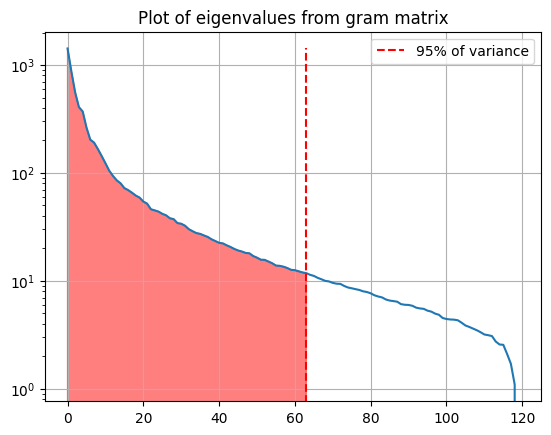

In [712]:
plt.title("Plot of eigenvalues from gram matrix")
plt.plot(gram_evalues)
plt.vlines(top95_idx,
           ymin=0,
           ymax=gram_evalues.max(),
           color='red',
           linestyle='--',
           label=r'95% of variance')
plt.fill_between(np.arange(top95_idx+1),
                 gram_evalues[:top95_idx+1],
                 color='red',
                 alpha=0.5)
plt.yscale('log')
plt.legend()
plt.grid()

    ANS:

### T17. Compute $\vec{v}$ . Don’t forget to renormalize so that the norm of each vector is 1 (you can use numpy.linalg.norm). Show the first 10 eigenvectors as images. Two example eigenvectors are shown below. We call these images eigenfaces (or eigenvoice for speech signals).

In [713]:
T.shape, gram_evectors.shape

((120, 2576), (120, 120))

In [714]:
# TODO: Compute v, then renormalize it.

# INSERT CODE HERE

v = np.matmul((T-meanface).T, gram_evectors)
v = v/np.linalg.norm(v, axis=0)

v.shape

(2576, 120)

In [715]:
def test_eignevector_cov_norm(v):
    assert (np.round(np.linalg.norm(v, axis=0), 1) == 1.0).all()

test_eignevector_cov_norm(v)

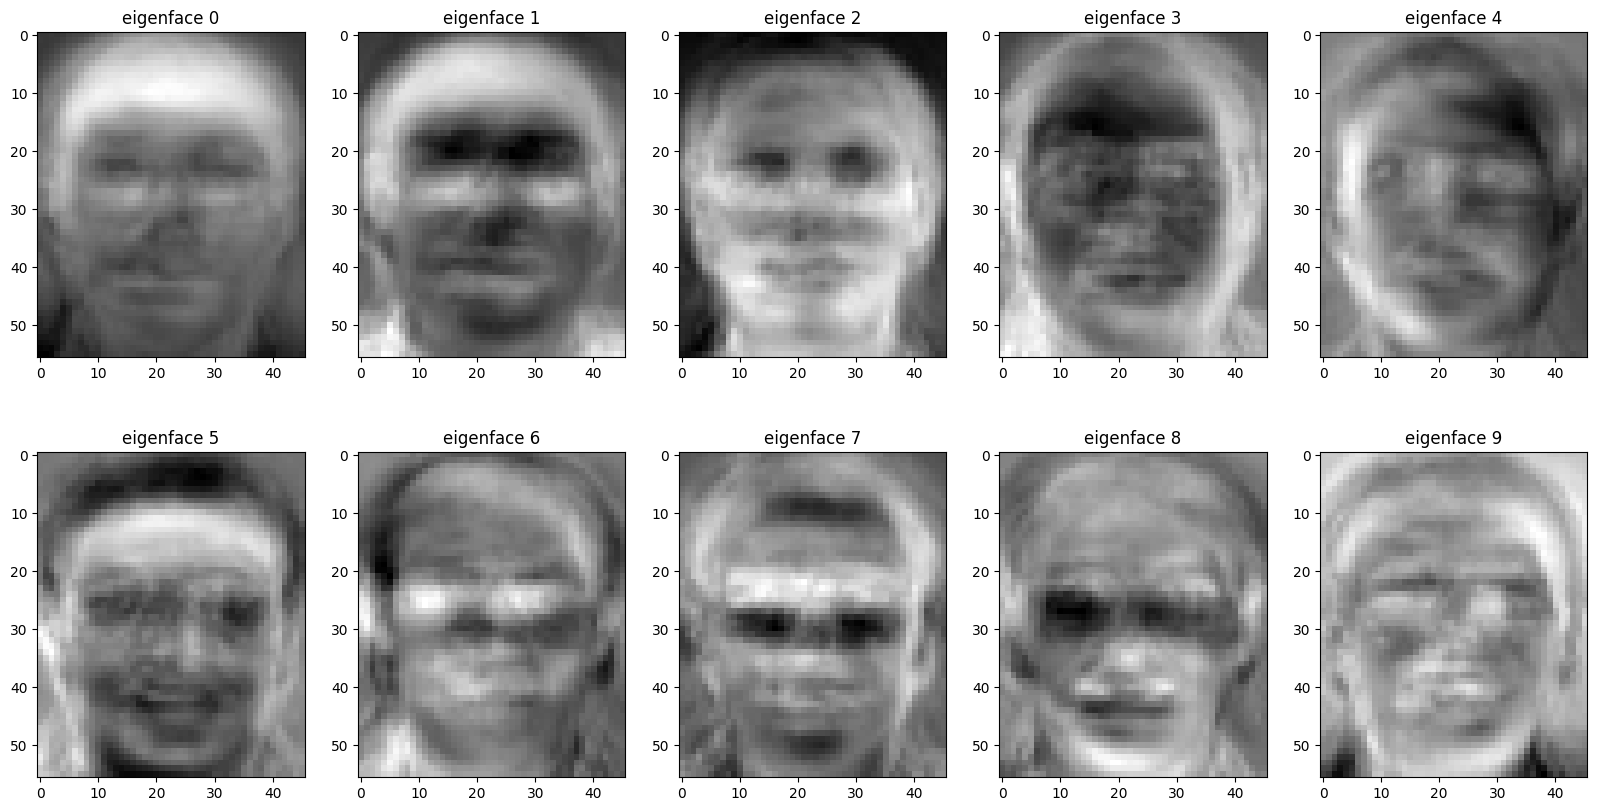

In [716]:
# TODO: Show the first 10 eigenvectors as images.

plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(f"eigenface {i}")
    plt.imshow(v[:, i].reshape(56,46), cmap='gray')

### T18. From the image, what do you think the first eigenvector captures? What about the second eigenvector? Look at the original images, do you think biggest variance are capture in these two eigenvectors?

    ANS:

### T19. Find the projection values of all images. Keep the first k = 10 projection values. Repeat the simple face verification system we did earlier using these projected values. What is the EER and the recall rate at 0.1% FAR?

In [717]:
def calculate_projection_vectors(matrix, meanface, v, k):
    """
    TODO: Find the projection vectors on v from given matrix and meanface.
    """
    projection_vectors = np.matmul(matrix-meanface, v[:, :k])

    return projection_vectors

In [718]:
# TODO: Get projection vectors of T and D, then Keep first k projection values.
k = 10
T_reduced = calculate_projection_vectors(T, meanface, v, k)
D_reduced = calculate_projection_vectors(D, meanface, v, k)


def test_reduce_dimension():
    assert T_reduced.shape[-1] == k
    assert D_reduced.shape[-1] == k

test_reduce_dimension()

In [719]:
T_reduced.shape, D_reduced.shape

((120, 10), (280, 10))

In [720]:
# TODO: Get similarity matrix of T_reduced and D_reduced
reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)

EER : 0.9214285714285714
Recall at 0.1%% FAR : 0.75


0.9214285714285714

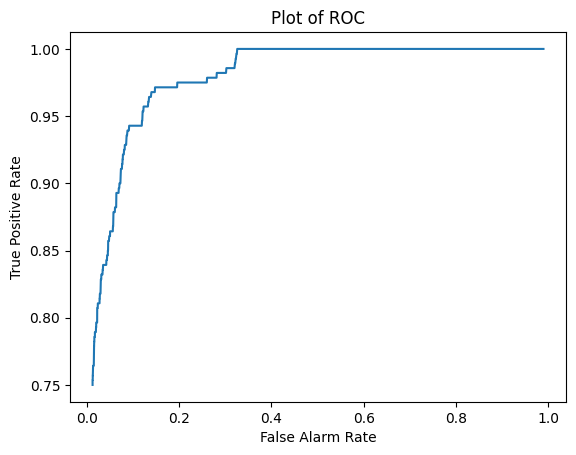

In [722]:
# TODO: Find EER and the recall rate at 0.1% FAR.
plot_roc(reduced_similarity_matrix)

    ANS:

### T20. What is the k that gives the best EER? Try k = 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.


for k = 5


EER : 0.8928571428571429
Recall at 0.1%% FAR : 0.8428571428571429
for k = 6
EER : 0.9071428571428571
Recall at 0.1%% FAR : 0.8
for k = 7
EER : 0.9071428571428571
Recall at 0.1%% FAR : 0.7857142857142857
for k = 8
EER : 0.9142857142857143
Recall at 0.1%% FAR : 0.775
for k = 9
EER : 0.9178571428571428
Recall at 0.1%% FAR : 0.7678571428571429
for k = 10
EER : 0.9214285714285714
Recall at 0.1%% FAR : 0.75
for k = 11
EER : 0.9214285714285714
Recall at 0.1%% FAR : 0.7214285714285714
for k = 12
EER : 0.9142857142857143
Recall at 0.1%% FAR : 0.7
for k = 13
EER : 0.9178571428571428
Recall at 0.1%% FAR : 0.6857142857142857
for k = 14
EER : 0.9178571428571428
Recall at 0.1%% FAR : 0.6642857142857143
Best EER is 0.9214285714285714 which k = 10


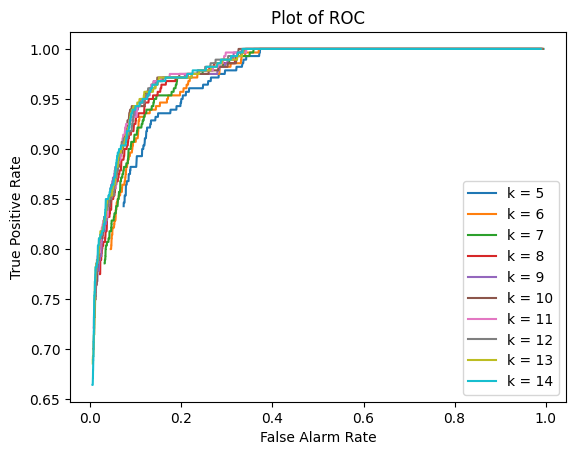

In [723]:
# INSERT CODE HERE
best_eer = -1
best_k = None
for k in range(5, 15):
    print(f"for k = {k}")
    T_reduced = calculate_projection_vectors(T, meanface, v, k)
    D_reduced = calculate_projection_vectors(D, meanface, v, k)


    reduced_similarity_matrix = generate_similarity_matrix(T_reduced, D_reduced)
    eer = plot_roc(reduced_similarity_matrix, label=f'k = {k}')
    if best_eer < eer:
        best_eer = eer
        best_k = k
plt.legend()
print(f"Best EER is {best_eer} which k = {best_k}")

    ANS:

### OT2

In [724]:
def MSE(x, y):
    return ((x-y)**2).mean()

MSE : 0.006148335016488305


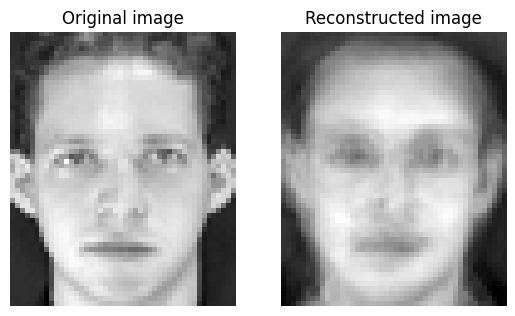

In [725]:
first_image = T[0]
first_image_reduced = calculate_projection_vectors(T[0], meanface, v, 10)
first_image_reconstructed = meanface + np.matmul(first_image_reduced, v[:, :10].T)

plt.subplot(1, 2, 1)
plt.imshow(first_image.reshape(56, 46), cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(first_image_reconstructed.reshape(56, 46), cmap='gray')
plt.title('Reconstructed image')
plt.axis('off')

print(f"MSE : {MSE(first_image, first_image_reconstructed)}")

### OT3

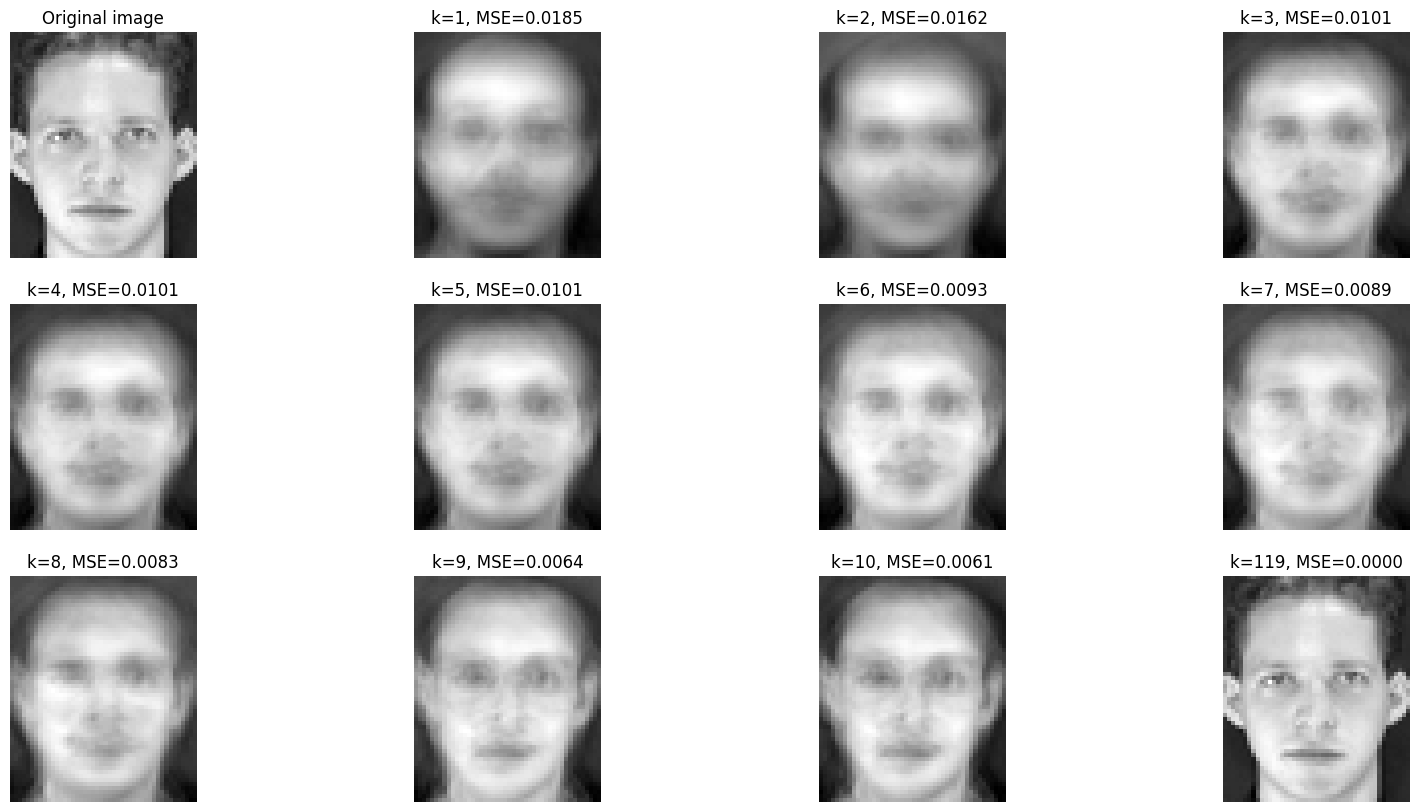

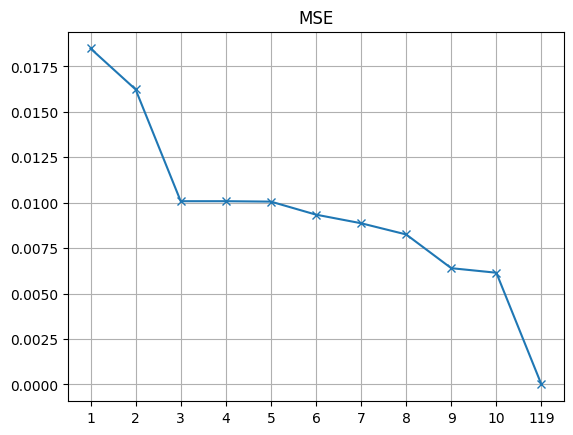

In [726]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 119])
y = np.zeros_like(x, dtype=float)
plt.figure(figsize=(20, 10))
plt.subplot(3, 4, 1)
plt.imshow(T[0].reshape(56, 46), cmap='gray')
plt.title('Original image')
plt.axis('off')

for idx, k in enumerate(x):
    plt.subplot(3, 4, idx+2)
    image_reduced = calculate_projection_vectors(T[0], meanface, v, k)
    image_reconstructed = meanface + np.matmul(image_reduced, v[:, :k].T)
    mse = MSE(T[0], image_reconstructed)

    y[idx] = mse
    plt.imshow(image_reconstructed.reshape(56, 46), cmap='gray')
    plt.title(f'k={k}, MSE={mse:.4f}')
    plt.axis('off')

plt.show()
plt.plot(np.arange(len(y)), y, marker='x')
plt.xticks(np.arange(len(x)), x)
plt.grid()
plt.title('MSE')
plt.show()

### OT4

In [727]:
size_per_original_image = 56*46
print(f"""
for original 1M images
\t- size per image : {size_per_original_image:3,} bytes
\t- total : {1e6*size_per_original_image:3,} bytes
compress version
\t- size for projection value : {10*4:3,} bytes/each
\t- eigenface : {56*46*4:3,} bytes/each
\t- meanface : {56*46*4:3,} bytes
\t- total : {1e6*10*4 + 10*56*46*4 + 56*46*4:3,} bytes
compression ratio : {1e6*size_per_original_image/(1e6*10*4 + 10*56*46*4 + 56*46*4):3,.2f} times
""".strip())

for original 1M images
	- size per image : 2,576 bytes
	- total : 2,576,000,000.0 bytes
compress version
	- size for projection value :  40 bytes/each
	- eigenface : 10,304 bytes/each
	- meanface : 10,304 bytes
	- total : 40,113,344.0 bytes
compression ratio : 64.22 times


### T21. In order to assure that $S_W$ is invertible we need to make sure that $S_W$ is full rank. How many PCA dimensions do we need to keep in order for $S_W$ to be full rank? (Hint: How many dimensions does $S_W$ have? In order to be of full rank, you need to have the same number of linearly independent factors)

    ANS:

In [728]:
# TODO: Define dimension of PCA.
n_dim = T.shape[0] - 40
print(f"Dimension : {n_dim}")

# TODO: Find PCA of T and D with n_dim dimension.
T_reduced = calculate_projection_vectors(T, meanface, v, n_dim)
D_reduced = calculate_projection_vectors(D, meanface, v, n_dim)

print(T_reduced.shape, D_reduced.shape)

Dimension : 80
(120, 80) (280, 80)


### T22. Using the answer to the previous question, project the original in- put to the PCA subspace. Find the LDA projections. To find the inverse, use −1 numpy.linalg.inv. Is $S_W$ $S_B$ symmetric? Can we still use numpy.linalg.eigh? How many non-zero eigenvalues are there?


LDA is symmetric? : False


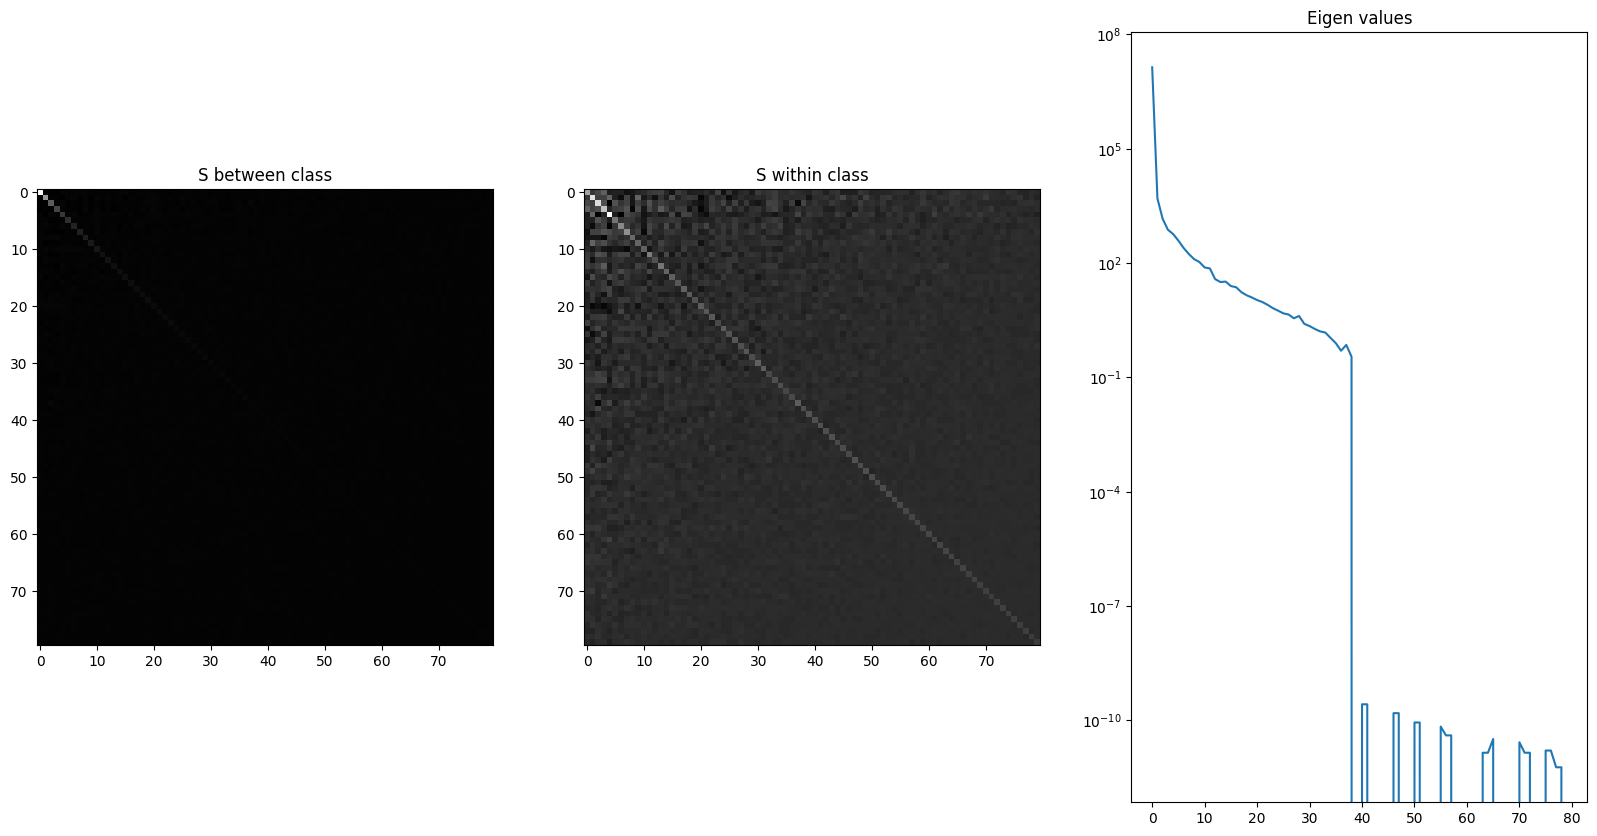

In [729]:
# TODO: Find the LDA projection.
T_reduced_by_class = T_reduced.reshape((40, 3, -1))
class_mean = T_reduced_by_class.mean(axis=1)
all_mean = class_mean.mean(axis=0).reshape(1, -1)

s_b = np.array([np.matmul((class_mean[i]-all_mean).T, (class_mean[i]-all_mean)) for i in range(class_mean.shape[0])]).sum(axis=0)

s_wi = np.array([np.matmul((T_reduced_by_class[i]-class_mean[i]).T, (T_reduced_by_class[i]-class_mean[i])) for i in range(class_mean.shape[0])])
s_w = s_wi.sum(axis=0)


LDA = np.matmul(np.linalg.inv(s_w), s_b)
print(f"LDA is symmetric? : {np.allclose(LDA, LDA.T)}")
LDA_evalues, LDA_evectors = np.linalg.eig(LDA)

LDA_evectors = LDA_evectors.real
LDA_evalues = LDA_evalues.real

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(s_b, cmap='gray')
plt.title("S between class")
plt.subplot(1, 3, 2)
plt.imshow(s_w, cmap='gray')
plt.title("S within class")
plt.subplot(1, 3, 3)
plt.title("Eigen values")
plt.plot(LDA_evalues)
plt.yscale('log')

plt.show()

In [730]:
# TODO: Find how many non-zero eigenvalues there are.
print(f"Amount of non-zero eigenvalues : {np.where(LDA_evalues>1e-5, 1, 0).sum()}")

Amount of non-zero eigenvalues : 39


    ANS:

### T23. Plot the first 10 LDA eigenvectors as images (the 10 best projections). Note that in this setup, you need to convert back to the original image space by using the PCA projection. The LDA eigenvectors can be considered as a linear combination of eigenfaces. Compare the LDA projections with the PCA projections.

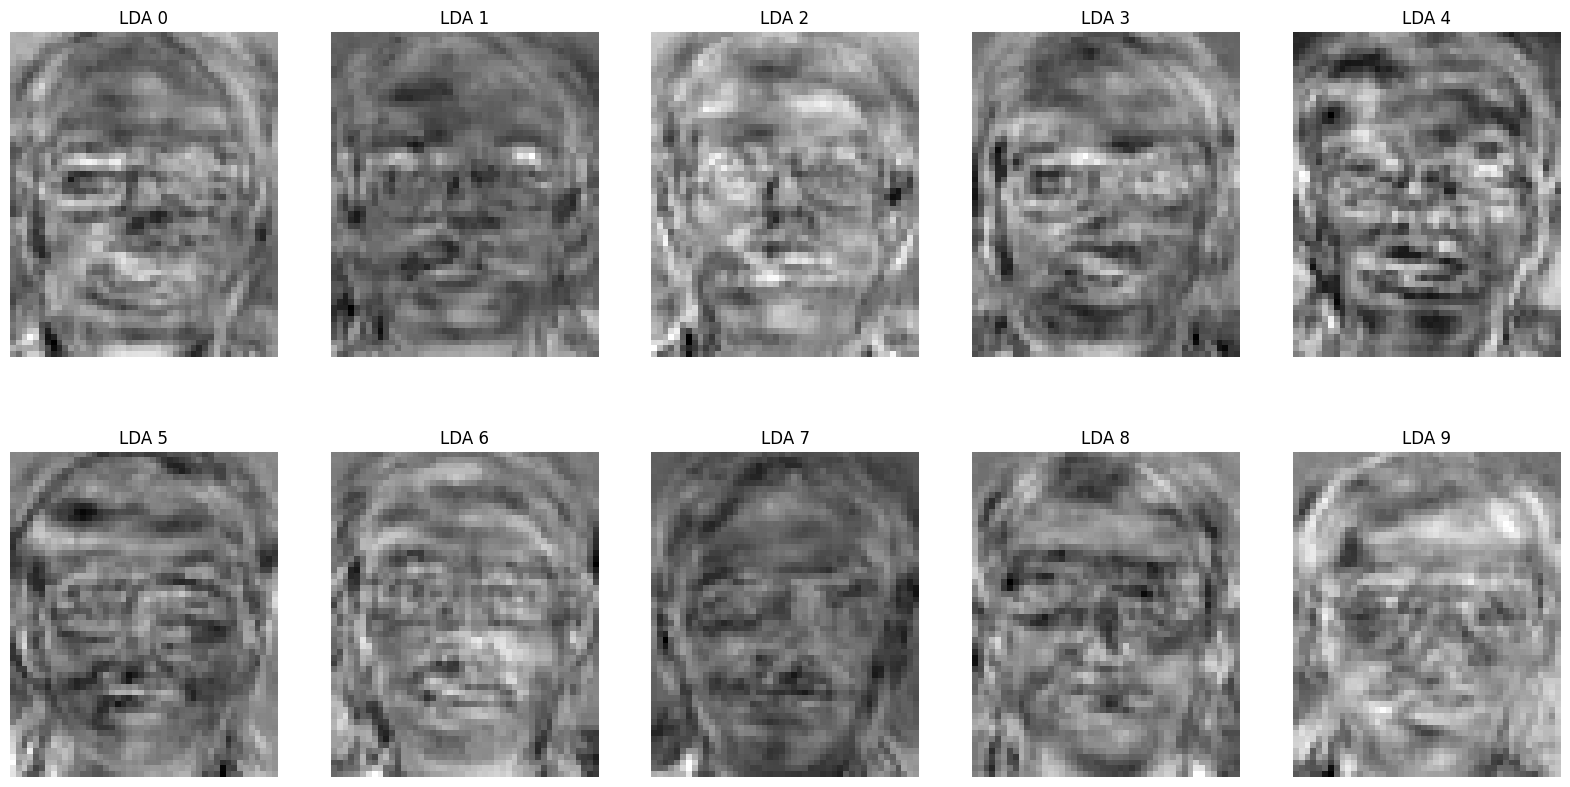

((120, 10), (280, 10))

In [731]:
# INSERT CODE HERE

best_10_LDA = LDA_evectors[:, :10]
T_LDA = np.matmul(T_reduced, best_10_LDA)
T_eigenface = np.matmul(v[:, :n_dim], best_10_LDA)

D_LDA = np.matmul(D_reduced, best_10_LDA)
D_eigenface = np.matmul(v[:, :n_dim], best_10_LDA)

plt.figure(figsize=(20, 10))
for idx in range(10):
    plt.subplot(2, 5, idx+1)
    plt.imshow(eigenface[:, idx].reshape(56, 46), cmap='gray')
    plt.title(f"LDA {idx}")
    plt.axis('off')

plt.show()

T_LDA.shape, D_LDA.shape

### T24. The combined PCA+LDA projection procedure is called fisherface. Calculate the fisherfaces projection of all images. Do the simple face verification experiment using fisherfaces. What is the EER and recall rate at 0.1% FAR?

EER : 0.8857142857142857
Recall at 0.1%% FAR : 0.5642857142857143


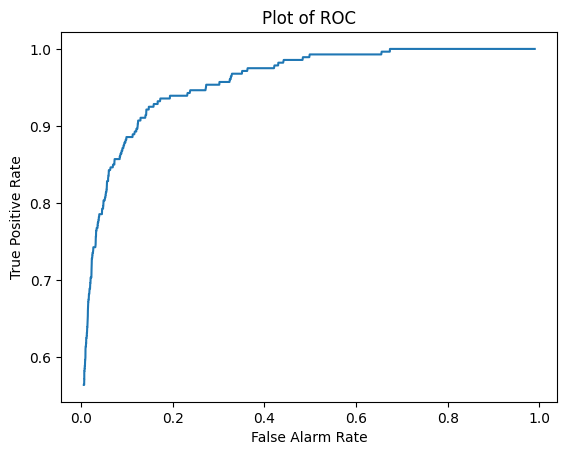

In [732]:
# INSERT CODE HERE

reduced_similarity_matrix = generate_similarity_matrix(T_LDA, D_LDA)
eer = plot_roc(reduced_similarity_matrix, label='LDA')


    ANS:

### T25.Plot the RoC of all three experiments (No projection, PCA, andFisher) on the same axes. Compare and contrast the three results. Submit yourwriteup and code on MyCourseVille.

for No projection
EER : 0.9107142857142857
Recall at 0.1%% FAR : 0.5464285714285714
for PCA
EER : 0.9321428571428572
Recall at 0.1%% FAR : 0.6071428571428571
for LDA
EER : 0.8857142857142857
Recall at 0.1%% FAR : 0.5642857142857143


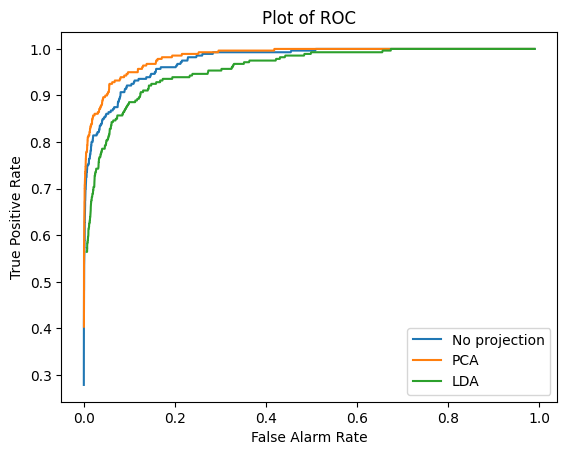

Best EER is 0.9321428571428572 from PCA


In [733]:
# No projection

setup = {
    'No projection': (T, D),
    'PCA': (T_reduced, D_reduced),
    'LDA': (T_LDA, D_LDA)
}
eer = []

for label, (curr_T, curr_D) in setup.items():
    similarity_matrix = generate_similarity_matrix(curr_T, curr_D)
    print(f"for {label}")
    eer.append(plot_roc(similarity_matrix, label=label))

plt.legend()
plt.show()

best_eer = max(eer)
best_idx = eer.index(best_eer)
print(f"Best EER is {best_eer} from {list(setup.keys())[best_idx]}")


    ANS: